# Link to code: https://github.com/Vazquez-Michael-V/570_homework/blob/main/assignment_1.ipynb

# Imports.

In [11]:
import pandas as pd
import numpy as np

import os

from IPython import get_ipython
from IPython.display import Image, display




# Notebook variables.

In [12]:
assignment_1_dir = os.getenv("ECON_570_ASSIGNMENT_1_DIR")
assignment_1_images_dir = os.getenv("ECON_570_ASSIGNMENT_1_IMAGES_DIR")


# Question 1 - Download and prep data.

## INDPRO data downloaded from FRED, no edits to data before download:<br>https://fred.stlouisfed.org/series/INDPRO#

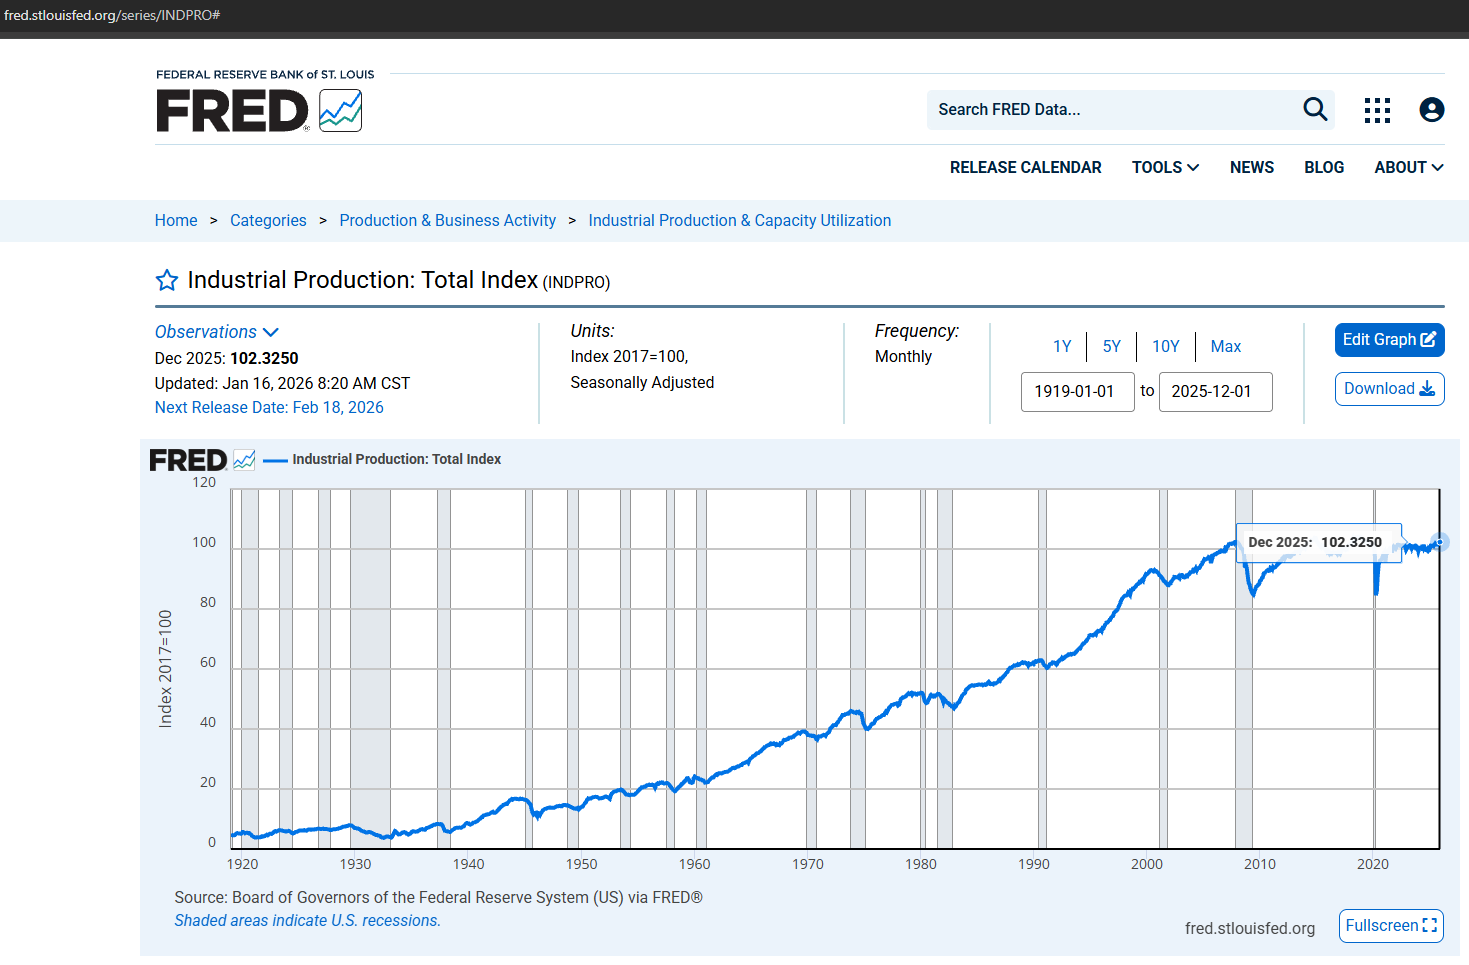

In [19]:
display(Image(rf'{assignment_1_images_dir}\\fred_indpro_download.png'))

## Read the downloaded csv.

In [13]:
df_indpro = pd.read_csv(rf"{assignment_1_dir}\\INDPRO.csv")
df_indpro['observation_date'] = pd.to_datetime(df_indpro['observation_date'])
df_indpro = df_indpro.rename(columns={'INDPRO': 'indpro'})

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Successfully read INDPRO file.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.2 KB
None
df_indpro shape: (1284, 2)
Successfully read INDPRO file.


## Add additional timeframe columns.

In [14]:
df_indpro = df_indpro.assign(
    year_quarter = pd.PeriodIndex(
        df_indpro['observation_date'],
        freq='Q'
    ),
    year_month = df_indpro['observation_date'].dt.strftime("%Y%m").astype('int64')
)

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Additional timeframe columns have been assigned.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
 2   year_quarter      1284 non-null   period[Q-DEC] 
 3   year_month        1284 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), period[Q-DEC](1)
memory usage: 40.3 KB
None
df_indpro shape: (1284, 4)
Additional timeframe columns have been assigned.


## Display some rows of df_indpro.

In [17]:
display(df_indpro.head(n=8))
display(df_indpro.tail(n=8))
display(df_indpro.sample(n=10))

,observation_date,indpro,year_quarter,year_month
0,1919-01-01,4.8739,1919Q1,191901
1,1919-02-01,4.6585,1919Q1,191902
2,1919-03-01,4.5238,1919Q1,191903
3,1919-04-01,4.6046,1919Q2,191904
4,1919-05-01,4.6315,1919Q2,191905
5,1919-06-01,4.9277,1919Q2,191906
6,1919-07-01,5.2239,1919Q3,191907
7,1919-08-01,5.3047,1919Q3,191908


,observation_date,indpro,year_quarter,year_month
1276,2025-05-01,100.9655,2025Q2,202505
1277,2025-06-01,101.4785,2025Q2,202506
1278,2025-07-01,101.8940,2025Q3,202507
1279,2025-08-01,101.5867,2025Q3,202508
1280,2025-09-01,101.7779,2025Q3,202509
1281,2025-10-01,101.5163,2025Q4,202510
1282,2025-11-01,101.9528,2025Q4,202511
1283,2025-12-01,102.3250,2025Q4,202512


,observation_date,indpro,year_quarter,year_month
175,1933-08-01,5.7356,1933Q3,193308
56,1923-09-01,5.9510,1923Q3,192309
605,1969-06-01,38.8874,1969Q2,196906
43,1922-08-01,4.9816,1922Q3,192208
1145,2014-06-01,102.7350,2014Q2,201406
515,1961-12-01,24.9080,1961Q4,196112
988,2001-05-01,90.3555,2001Q2,200105
479,1958-12-01,21.6767,1958Q4,195812
433,1955-02-01,19.5494,1955Q1,195502
203,1935-12-01,6.6511,1935Q4,193512


# Question 1 - Summary statistics for entire timeframe of downloaded data.

## Summary statistics for column 'observation_date'. Note that the min and max are 1919 and 2025 respectively, which is the timeframe requested in the assignment.

In [40]:
df_indpro['observation_date'].describe()

count                             1284
mean     1972-06-16 02:01:07.289719632
min                1919-01-01 00:00:00
25%                1945-09-23 12:00:00
50%                1972-06-16 00:00:00
75%                1999-03-08 18:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

## Summary statistics for column 'indpro'. As shown at the end of lecture 2 slides, the summary statistics are mean, median, variance, standard deviation, skewness, and kurtosis.

In [ ]:
# Could start with df_indpro['indpro'].describe(), but count, 25%, and 75% aren't of interest for this question, and
# describe() doesn't include some stats required by the question.

df_indpro_stats = pd.DataFrame(
    data={
        'mean': [df_indpro['indpro'].mean()],
        'median': [df_indpro['indpro'].median()],
        'var': [df_indpro['indpro'].var()],
        'std_dev': [df_indpro['indpro'].std()],
        'skewness': [df_indpro['indpro'].skew()],
        'kurtosis': [df_indpro['indpro'].kurtosis()]
        }
    ).T\
    .reset_index(names='statistic')\
    .rename(columns={0: 'value'}, errors='raise')\
    .round(4)

display(df_indpro_stats)


,statistic,value
0,mean,46.7118
1,median,40.5312
2,var,1234.6693
3,std_dev,35.1379
4,skewness,0.3519
5,kurtosis,-1.3768


# TODO: Question 1 - Summary statistics from year_month 200001 to 202512.

# TODO: Question 1 - Summary statistics from year_month 202006 to 202512.